# Análise de Churn com TensorFlow

Este Notebook foi criado para analisar o dataset Churn.csv do curso ONE-G8 da Alura/Oracle, utilizando uma abordagem diferente do curso, criando um modelo de Neural Network com TensorFlow/Keras.

In [34]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [35]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/churn.csv'
df = pd.read_csv(url)

In [36]:
df.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


# Limpando os dados

In [37]:
x = df.drop(['churn', 'id_cliente'], axis=1)
y = df['churn']
     

In [38]:

colunas = x.columns.tolist()
col_categoricas = x.select_dtypes(include=['object']).columns.tolist()
col_numericas = x.select_dtypes(include=['number']).columns.tolist()
print(f'Categóricas: {col_categoricas}')
print(f'Numéricas: {col_numericas}')

Categóricas: ['pais', 'sexo_biologico']
Numéricas: ['score_credito', 'idade', 'anos_de_cliente', 'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo', 'salario_estimado']


In [39]:
col_categoricas = ['pais', 'sexo_biologico', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo']
col_numericas = ['score_credito', 'idade', 'anos_de_cliente', 'saldo', 'salario_estimado']

In [40]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
colunas = x.columns
one_hot = make_column_transformer((
    OneHotEncoder( drop = 'if_binary'),
    col_categoricas
),
    remainder='passthrough',
    sparse_threshold=0)

     

X = one_hot.fit_transform(x)
     

one_hot.get_feature_names_out()
     


array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__servicos_adquiridos_1',
       'onehotencoder__servicos_adquiridos_2',
       'onehotencoder__servicos_adquiridos_3',
       'onehotencoder__servicos_adquiridos_4',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__salario_estimado'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 1, ..., 1, 1, 0])

# Preparação do dataset Test e Train

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Normalização

In [43]:
normalizacao = MinMaxScaler()
X_train = normalizacao.fit_transform(X_train)
X_test = normalizacao.transform(X_test)
pd.DataFrame(X_train, columns=one_hot.get_feature_names_out())

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,onehotencoder__servicos_adquiridos_1,onehotencoder__servicos_adquiridos_2,onehotencoder__servicos_adquiridos_3,onehotencoder__servicos_adquiridos_4,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__salario_estimado
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.672,0.189189,0.6,0.000000,0.895550
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.564,0.324324,0.4,0.476786,0.980029
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.418,0.081081,0.3,0.457317,0.429261
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.422,0.121622,0.9,0.540606,0.765408
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.334,0.513514,0.9,0.566554,0.197107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.836,0.486486,0.8,0.277853,0.346662
7996,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.664,0.540541,0.1,0.000000,0.003084
7997,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.770,0.270270,0.1,0.000000,0.460925
7998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.634,0.337838,0.8,0.758186,0.487381


# Construindo e treinando o modelo

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(15, activation='relu', input_shape=(15,)), 
    #Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
#model.fit(X_train, y_train, epochs=20, batch_size=10)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

# Realizando o Treinamento e Avaliação do Modelo

Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7869 - loss: 0.4647 - val_accuracy: 0.8087 - val_loss: 0.4180
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8188 - loss: 0.4102 - val_accuracy: 0.8331 - val_loss: 0.3937
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8347 - loss: 0.3933 - val_accuracy: 0.8344 - val_loss: 0.3824
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8392 - loss: 0.3854 - val_accuracy: 0.8431 - val_loss: 0.3763
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8388 - loss: 0.3809 - val_accuracy: 0.8450 - val_loss: 0.3727
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8430 - loss: 0.3780 - val_accuracy: 0.8481 - val_loss: 0.3712
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8416 - loss: 0.3766 - val_accuracy: 0.8444 - val_loss: 0.3701
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8434 - loss: 0.3754 - val_accuracy: 0.

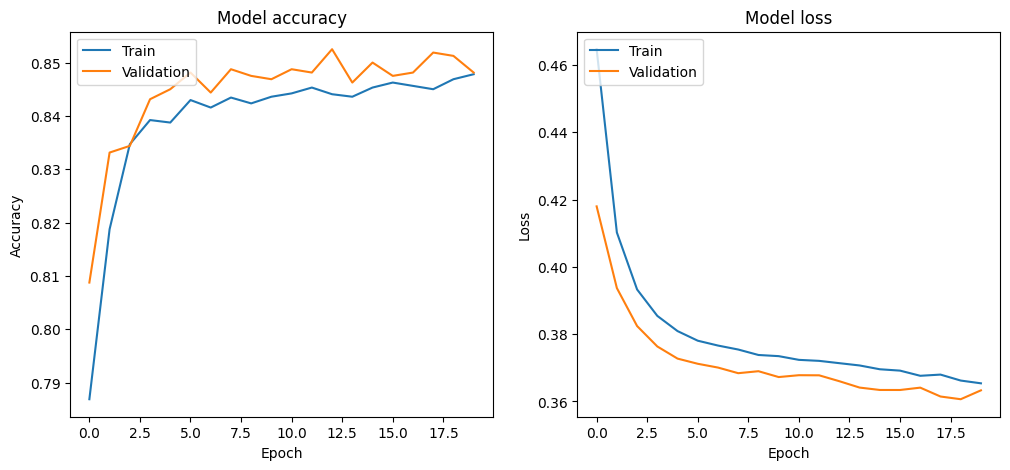

In [45]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [46]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3661  
Test Accuracy: 0.8495000004768372


# Testando o Modelo com novos dados

In [47]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [57],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': [1],
    'membro_ativo': [1],
    'salario_estimado': [85270.00]
})

predicao = model.predict(normalizacao.transform(one_hot.transform(novo_dado)))
print("Resultado para o novo dado:", predicao)
predicao = label_encoder.inverse_transform((predicao > 0.5).astype(int))
print("Predição:", predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Resultado para o novo dado: [[0.28616238]]
Predição: [0]


In [48]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [57],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': [1],
    'membro_ativo': [0],
    'salario_estimado': [85270.00]
})

predicao = model.predict(normalizacao.transform(one_hot.transform(novo_dado)))
print("Resultado para o novo dado:", predicao)
predicao = label_encoder.inverse_transform((predicao > 0.5).astype(int))
print("Predição:", predicao)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Resultado para o novo dado: [[0.64934045]]
Predição: [1]
